<h1><center>Face detection and emotion recognition</center></h1>

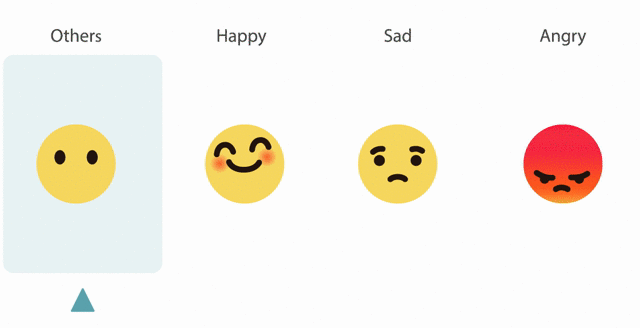

## Цель урока

* Узнать что такое эмоции, почему их важно распознавать и как
* Как можно локализовать лицо с изображения
* Получим практические навыки создания и обучения НС для распознавания эмоций
* Узнаем что такое Transfer Learning

# План занятия

* Эмоция
* Детектирование лиц
* Распознавание эмоций
* Подготовка датасета, описание модели и обучение
* Построение пайплайна распознавания эмоций
* Пару слов о Transfer Learning
* Заключение

<h1><center>Теория</center></h1>

На сколько нам известно, эмоции играют важную роль в нашей жизни. Нам нужна система, которая ведет себя нужным образом в зависимости от нашего поведения и эмоций.
Такие IT гиганты как Apple, Google, Amazon пытаются сделать их виртуалных ассистентов Siri, Google Assistant, Alexa больше похожих на людей. Эти компании проводят масштабные исследования и разработки, чтобы сделать своиx виртуальных помощников более гуманными благодаря ИИ. Идея состоит в том, чтобы объединить цифровых помощников с моделью машинного обучения, которая способна определять эмоции лица человека и учитывать эту информацию в своих действиях.

## Эмоция

На данный момент нет эталоной меры для определения эмоций. Все чем мы можем оперировать в этом вопросе - это внешними признаками, по которым мы определяем какая у человека эмоция. Если в будущем появится технология с помощью которой мы смогли бы заглянуть в мозг человека и распознать определенную его схему, по которой и запускаются все эмоции - тогда и появится эталон для определения что же такое эмоция. Но  мы попробуем. Если мы посмотрим в википедию, то найдем следующее определение:

Эмоция - это биологическое состояние нервной системы, вызваное нейрофизиологическими изменениями, которые по-разному связаны с мыслями, чувствами, поведенчискими реакциями и степенью  удовольствия или неудовольствия. Обширно, но вроде понятно. Но зачем людям понадобился такой механизм. Как нам говорит российский физиолог П.К. Анохин в своей теории, способность испытывать эмоции была выработана в процессе эволюции как средство более успешной адаптации живых существ к условиям существования. Эмоция оказалась полезной для выживаемости и позволила живым существам быстро и наиболее экономно реагировать на внешние воздействия. Таким образом, с помощью эмоций можно было очень легко передавать важную информацию от человека к человеку.

В нашем общении эмоции и вправду занимают огромную роль. При этом их можно выразить по-разному: мимика, голос, поза, двигательные и вегетативные(артериальное давление, частота дыхания, частота биения сердца) реакции. При этом мы все можем понять и по выражению лица.

Предствители разных культур одни и те же эмоции могут выражать по-разному. В 70-х годах известный психолог [Пол Экман](https://www.youtube.com/watch?v=X4KfdomhIIo) исследовал невербальное общение изолированных племен в Папуа-Новой Гвинее. В ходе [исследования](https://www.ekmaninternational.com/a-brief-history-into-paul-ekmans-early-research/) он установил, что определенные эмоции являются универсальными и каждый человек может их понять, независимо от его культуры. Это следующие семь эмоций: гнев, страх, печаль, отвращение, презрение, удивление и радость.
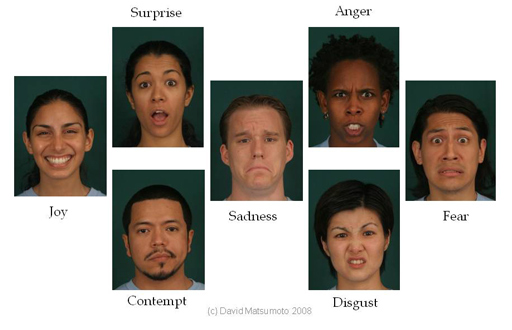
 

Давайте попробуем разобраться в алгоритме распознавания эмоций лица человека по изображению.

## Детектирование лиц

Для начала нам нужно найти на изображении лицо человека. Что ж, детекция лиц давно уже вышла из аккадемии в большой бизнес. И здесь, как и в любом бизнесе, производители стремятся доказать, что их алгоритмы лучше, но не всегда предоставляют данные открытого тестирования. К примеру, на конкурсе [MegaFace](https://old.sk.ru/news/b/news/archive/2017/05/11/vokord-vnov-pobedil-v-mirovom-konkurse-raspoznavaniya-lic.aspx) на тот момент лучшую точность показывал российский алгоритм deepVo V3 компании Вокорд с результатом 92%.  FaceNet v8 в этом же конкурсе показывает всего 70%, а DeepFace от Facebook с заявленной точностью в 97% в конкурсе вовсе не участвовал. Читать такие цифры стоит с острожностью. Тем не менее, мы видим что лучшие алгоритмы очень близки к человеческой точности распознавания лиц.
[Сейчас](https://d-russia.ru/rossijskaja-kompanija-vyigrala-konkurs-razrabotchikov-sistem-raspoznavanija-lic-organizovannyj-nist.html) победителем многих конкурсов является алгоритм от [NtechLab](https://ntechlab.ru/)

Тема детектирования лиц очень обширна и вряд ли укладывается в рамки одного вебинара. Поэтому предлагаю взять уже готовое решение, которое предсталяет PyTorch в библиотеке [facenet-pytorch](https://github.com/timesler/facenet-pytorch). В ней представлены наиболее удачные архитектуры сетей, которые могут детектировать и распознавать лица. В их число входят каскадная нейронная сеть MTCNN для детектирования лиц и Inception ResNet для распознавания найденных лиц. 

Давайте разберем, как MTCNN работает. 

В многозадачной каскадной нейронной сети ([Multi-task Cascaded Convolutional Networks](https://arxiv.org/pdf/1604.02878.pdf)), обнаружение лица и выравнивание лица выполняются совместно, в многозадачном режиме. Это позволяет модели лучше определять лица, которые изначально не выровнены. Процесс состоит из трех стадий сверточных сетей, которые могут распознать лица и такие особенные точки как глаза, нос и рот. В первой стадии используется поверхностаная сверточная сеть для быстрого создания окон-кандидатов. Во второй стадии уточняется предложенные окна-кандидаты с помощью более сложной сверточной сети. И в конце используется еще более сложная сеть для дальнейшего уточнения результата и вывода позиций особенных точек лица. 

## Три стадии MTCNN

[статья(2016)](https://arxiv.org/pdf/1604.02878.pdf)

Шаг 1. Сеть предложения (Proposal Network, P-Net)

Первый шаг - взять изображение и изменить его размер до различных масштабов, чтобы построить пирамиду изображений, которая является входом для следующей трехступенчатой каскадной сети.
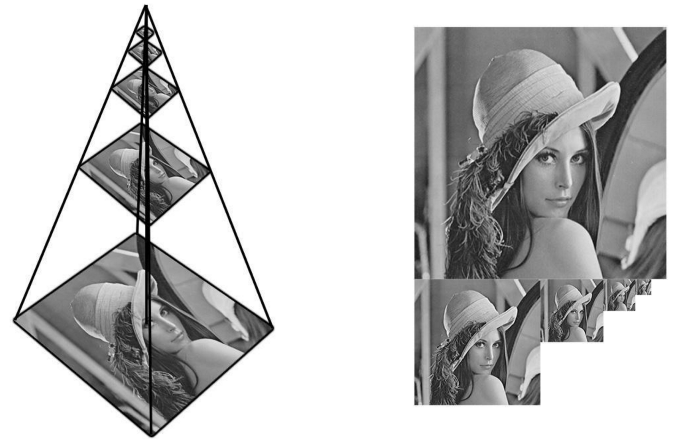

Это делается с помощью полносвязной сверточной сети (FCN). Разница между CNN и FCN в том, что полносвязная сверточная сеть не использует полносвязный Linear слой как часть архитектуры. Эта сеть предложения используется для получения окон-кандидатов и их вектора полученного в результате метода bounding box regression.

bounding box regression - популярная техника предсказывания нахождения обрамляющего прямоугольника, когда цель в детектировании объекта некоторого предопределенного класса(в нашем лучае это лица). После получения векторов обрамляющего прямоугольника выполняется некоторое уточнение для объединения перекрывающихся регионов. Конечным результатом этого этапа являются все окна-кадидаты после уточнения для уменьшения количества кандидатов.
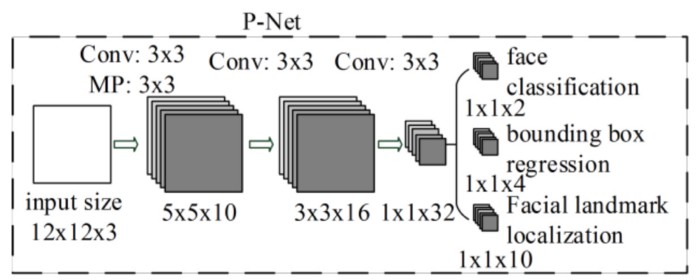

Шаг 2. Уточняющая сеть (Refine Network, R-Net)

Все кандидаты из P-net подаются в уточняющую сеть. Обратите внимание, что эта сеть CNN а не FCN. R-Net дополнительно сокращает количество кандидатов, выполняет калибровку с регрессией ограничивающей рамки и использует NMS чтобы объединить совпадающих кандидатов.

R-Net выводит, является ли ввод лицом или нет, 4-элементный вектор, который является обрамляющей рамкой для лица, и 10-элементный вектор для локализации лицевых особенных точек.
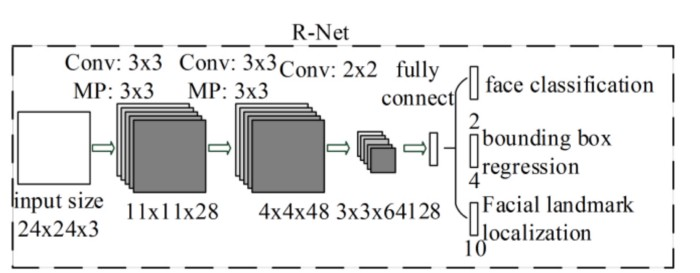

Шаг 3. Выходная сеть (Output Network, O-Net)

Этот этап аналогичен R-Net, но эта сеть вывода нацелена на более подробное описание лица и вывод положений пяти лицевых особенных точек для глаз, носа и рта.
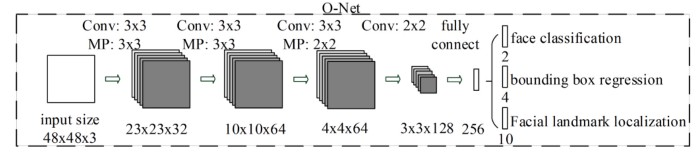

Задача всей сети состоит в том, чтобы вывести три вещи: классификацию лицо/не лицо, обрамляющие рамки лиц и локализацию лицевых особенных точек.

[ссылка на гид по использованию mtcnn в facenet-pytorch](https://www.kaggle.com/timesler/guide-to-mtcnn-in-facenet-pytorch)

## Распознавание эмоций

----

В качестве архитектуры для распознавания эмоций возьмем вариацию на тему [ResNet9](https://medium.com/swlh/natural-image-classification-using-resnet9-model-6f9dc924cd6d). В задаче распознавания эмоций изображений лица наиболее хорошие результаты показывают сверточные архитектуры. Они хорошо справляются с задачей нахождения особенных точек на лице и интерпретацией их расположения между собой.
Сети ResNet отличаются от остальных сетей наличием так называемых остаточных блоков. Схема блока предсавлена на картинке:

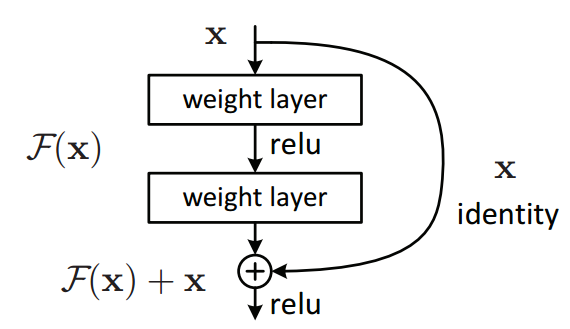



<h1><center>Практическая часть</center></h1>

Загрузим все необходимые библиотеки и начнем:

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import time
from torch.autograd import Variable
import pandas as pd
import seaborn

## Часть 1. Подготовка данных

Шаг 1.

Создадим объекты для необходимых трансформаций нашего датасета:

In [2]:
train_transforms = tt.Compose([tt.Grayscale(num_output_channels=1), # Картинки чернобелые
                         
                         # Настройки для расширения датасета
                         tt.RandomHorizontalFlip(),           # Случайные повороты на 90 градусов
                         tt.RandomRotation(30),               # Случайные повороты на 30 градусов
                         #tt.Normalize((0.5), (0.5), inplace=True),
                         tt.RandomCrop(48, padding=4, padding_mode='reflect'),
                         tt.RandomHorizontalFlip(),
                         tt.ToTensor()])                      # Приведение к тензору

test_transforms = tt.Compose([tt.Grayscale(num_output_channels=1), tt.ToTensor()])

Шаг 2.

Для обучения нейронной сети будем использовать этот [датасет](https://www.kaggle.com/chiragsoni/ferdata?) (54 MB).
Загрузим его и распакуем содержимое в папку 'Emotion_recognition'.

Видим, что внутри две папки с тестовыми и тренировочными картинками:

In [3]:
data_dir = './Emotion_recognition'
print(os.listdir(data_dir))

['test', 'train']


Если посмотрим что в них, то у видим 7 папок. Каждая под один из 7 классов эмоций:

In [4]:
classes_train = os.listdir(data_dir + "/train")
classes_test = os.listdir(data_dir + "/test")
print(f'Train Classes - {classes_train}')
print(f'test Classes - {classes_test}')

Train Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
test Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Сразу давайте напишем словарь для сопоставления выхода с нейронной сети с названием определенной эмоции:

In [5]:
# def digit_to_classname(digit):
#         if digit == 0:
#             return 'sad'
#         elif digit == 1:
#             return 'disgust'
#         elif digit == 2:
#             return 'happy'
#         elif digit == 3:
#             return 'surprise'
#         elif digit == 4:
#             return 'neutral'
#         elif digit == 5:
#             return 'fear'
#         elif digit == 6:
#             return 'angry'
        
digit_to_classname = {0:'sad', 1:'disgust', 2:'happy', 3:'surprise', 4:'neutral', 5:'fear', 6:'angry'}

Используем ImageFolder для каждой выборки:

In [6]:
train_dataset = ImageFolder(data_dir + '/train', train_transforms)
test_dataset  = ImageFolder(data_dir + '/test', test_transforms)

In [7]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 28709
    Root location: ./Emotion_recognition/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomCrop(size=(48, 48), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

Определим размер батча:

In [8]:
batch_size = 30

Шаг 3.

Создадим наши даталоадеры:

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size, num_workers=3, pin_memory=True)

Создадим функцию для просмотра случайных картинок из получившегося датасета:

In [10]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        print(images[0].shape)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break
    

torch.Size([1, 48, 48])


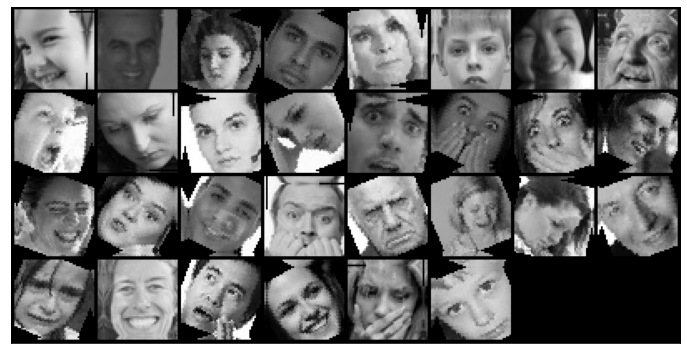

In [11]:
show_batch(train_dataloader)

Шаг 4.

Напишем функции для перевода наших моделей и Даталоадеров на необходимое оборудование:

In [12]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

Узнаем какое оборудование у нас:

In [13]:
device = get_default_device()
device

device(type='cuda')

Воспользуемся функциями написанными выше:

In [14]:
train_dataloader = DeviceDataLoader(train_dataloader, device)
test_dataloader = DeviceDataLoader(test_dataloader, device)

## Часть 2. Создание модели

Опишем нашу модель для распознавания эмоций:

In [15]:


class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = self.conv_block(in_channels, 128)
        self.conv2 = self.conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(self.conv_block(128, 128), self.conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = self.conv_block(128, 256)
        self.conv4 = self.conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(self.conv_block(256, 256), self.conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = self.conv_block(256, 512)
        self.conv6 = self.conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(self.conv_block(512, 512), self.conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes),
                                        nn.Softmax(dim=1))
    
    @staticmethod
    def conv_block(in_channels, out_channels, pool=False):
        layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
                  nn.BatchNorm2d(out_channels), 
                  nn.ELU(inplace=True)]
        if pool: layers.append(nn.MaxPool2d(2))
        return nn.Sequential(*layers)
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        print(111,out.size())
        out = self.res3(out) + out
        print(222,out.size())
        out = self.drop3(out)
        print(333,out.size())
        
        out = self.classifier(out)
        return out

Давайте я дам некоторые пояснения по поводу использования того или иного слоя.

BatchNorm2d - вывод со сверточного слоя может быть довольно большим, что может негативно повлиять на нашу модель. А этот слой просто нормализует полученные данные.

ELU - можно использовать и Relu, но ELU быстрее стремится к нулю.

In [16]:
model = to_device(ResNet(1, len(classes_train)), device)

In [17]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

## Часть 3. Обучение

In [18]:
# Если работаете на гпу, очищаем весь кэш
if torch.cuda.is_available(): 
    torch.cuda.empty_cache()


epochs = 30
max_lr = 0.0001
grad_clip = 0.1
weight_decay = 1e-4
optimizer = torch.optim.Adam(model.parameters(), max_lr)

In [19]:
total_steps = len(train_dataloader)
print(f'{epochs} epochs, {total_steps} total_steps per epoch')

30 epochs, 957 total_steps per epoch


Добавим learning_rate_sheduler:

In [20]:
print(torch.__version__)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_dataloader))

1.8.1+cu102


In [22]:
epoch_losses = []
true_y = []
pred_y = []

sm=nn.Softmax(dim=0)

for epoch in range(epochs):
    
    time1 = time.time()
    running_loss = 0.0
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_dataloader):
        data, labels = data.cuda(), labels.cuda() 
        
        print(11,data.shape, labels.shape)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        
        
        
#         print(outputs[0])
        #print(labels[0])
        _, preds = torch.max(outputs, 1)
        #print(preds)
        
        true_y.append(labels.to('cpu'))
        pred_y.append(outputs.to('cpu'))
        
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        if (batch_idx+1) % 10000 == 9999:
            print(f'Train Epoch: {epoch+1}, Loss: {running_loss/10000}')
            time2 = time.time()
            print(f'Spend time for 10000 images: {time2 - time1} sec')
            time1 = time.time()
            running_loss = 0.0
    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss))
    epoch_losses.append(epoch_loss)
    

11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512, 6, 6])
11 torch.Size([30, 1, 48, 48]) torch.Size([30])
111 torch.Size([30, 512, 6, 6])
222 torch.Size([30, 512, 6, 6])
333 torch.Size([30, 512,

KeyboardInterrupt: 

Посмотрим на нашу ошибку в процессе обучения:

In [ ]:
losses = [np.mean(loss) for loss in epoch_losses]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('losses vs. No. of epochs')

Сохраним нашу модель:

In [63]:
torch.save(model.state_dict(), './models/emotion_detection_model_state_150_epochs.pth')

## Часть 4. Результаты

Теперь давайте загрузим ее и будем использовать:

In [41]:
net=ResNet(1, len(classes_train)).to(device)
net.load_state_dict(torch.load('./models/emotion_detection_model_state_150_epochs.pth'))
net.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

Прогоним нашу нейронную сеть через тестовый датасет:

torch.Size([30, 1, 48, 48])
torch.Size([7])


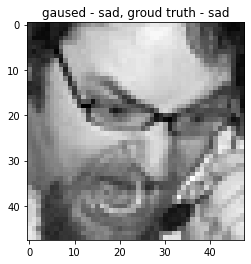

torch.Size([30, 1, 48, 48])
torch.Size([7])


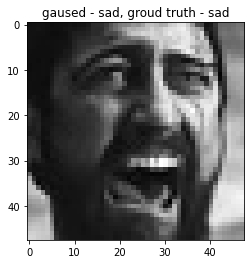

torch.Size([30, 1, 48, 48])
torch.Size([7])


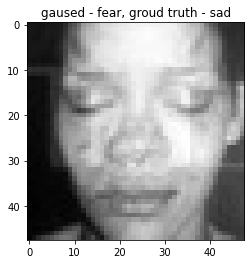

torch.Size([30, 1, 48, 48])
torch.Size([7])


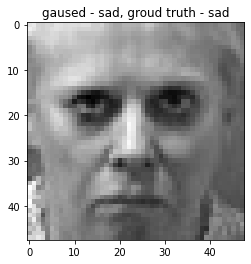

torch.Size([30, 1, 48, 48])
torch.Size([7])


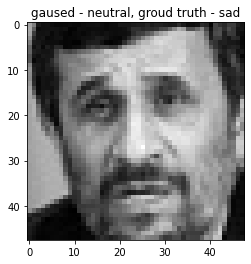

torch.Size([30, 1, 48, 48])
torch.Size([7])


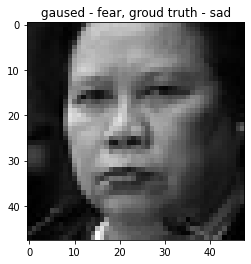

torch.Size([30, 1, 48, 48])
torch.Size([7])


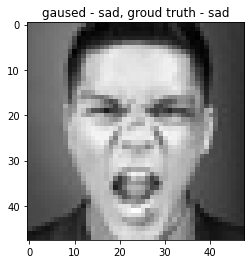

torch.Size([30, 1, 48, 48])
torch.Size([7])


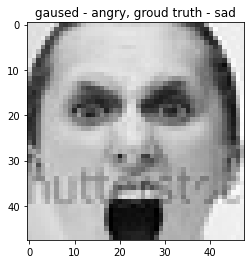

torch.Size([30, 1, 48, 48])
torch.Size([7])


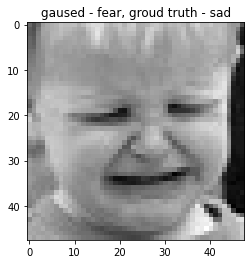

torch.Size([30, 1, 48, 48])
torch.Size([7])


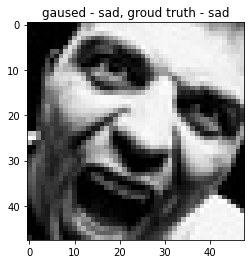

torch.Size([30, 1, 48, 48])
torch.Size([7])


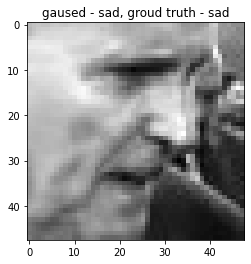

torch.Size([30, 1, 48, 48])
torch.Size([7])


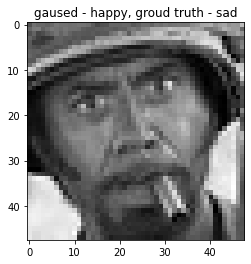

In [42]:
with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        images, labels = data
        images, labels = images, labels
        outputs = net(images)
        print(images.shape)
        print(outputs[0].shape)
        plt.title(f'gaused - {digit_to_classname[outputs[0].argmax().item()]}, groud truth - {digit_to_classname[labels[0].data.item()]}')
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.show()
        if i>10:
            break

''

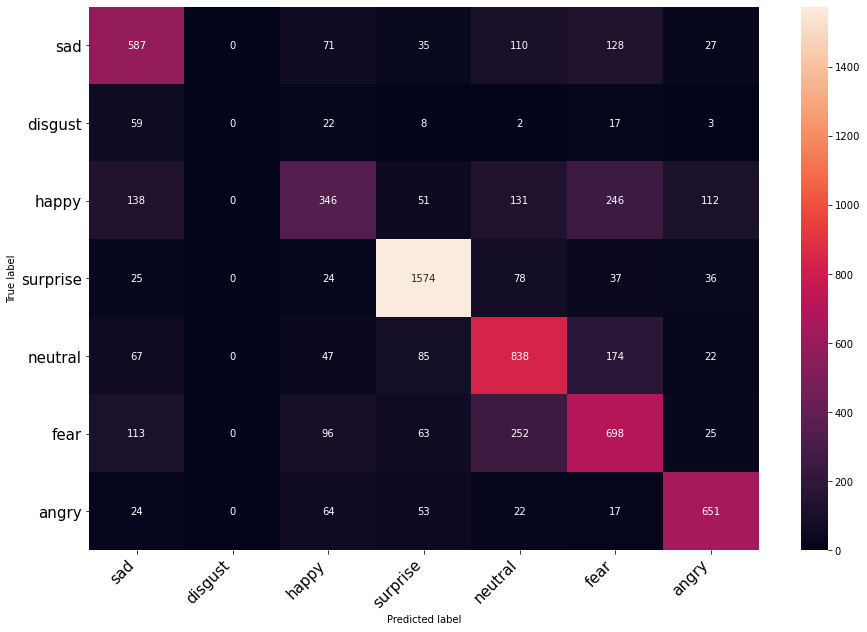

In [43]:
confusion_matrix = torch.zeros(7, 7)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list(digit_to_classname.values())
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = seaborn.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

Напишем скрипт, в котором мы построим пайплайн распознавания эмоций найденного лица с изображения. Здесь со своей вебкамеры я ловлю кадры. На каждом кадре я нахожу лица и для каждого лица определяю эмоцию. И все это рисую прямо на кадре и отображаю через cv2.imshow:

In [34]:
# !pip install facenet_pytorch

In [ ]:
class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = self.conv_block(in_channels, 128)
        self.conv2 = self.conv_block(128, 128, pool=True)
        self.res1 = nn.Sequential(self.conv_block(128, 128), self.conv_block(128, 128))
        self.drop1 = nn.Dropout(0.5)
        
        self.conv3 = self.conv_block(128, 256)
        self.conv4 = self.conv_block(256, 256, pool=True)
        self.res2 = nn.Sequential(self.conv_block(256, 256), self.conv_block(256, 256))
        self.drop2 = nn.Dropout(0.5)
        
        self.conv5 = self.conv_block(256, 512)
        self.conv6 = self.conv_block(512, 512, pool=True)
        self.res3 = nn.Sequential(self.conv_block(512, 512), self.conv_block(512, 512))
        self.drop3 = nn.Dropout(0.5)
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes),
                                        nn.Softmax(dim=1))
    
    @staticmethod
    def conv_block(in_channels, out_channels, pool=False):
        layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
                  nn.BatchNorm2d(out_channels), 
                  nn.ELU(inplace=True)]
        if pool: layers.append(nn.MaxPool2d(2))
        return nn.Sequential(*layers)
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.drop1(out)
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.drop2(out)
        
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.drop3(out)
        
        out = self.classifier(out)
        return out

# 5. Обучение второй модели

In [46]:
class FERModel(nn.Module):
    def __init__(self, in_chnls, num_cls):
        super().__init__()
        
        self.conv1 = self.conv_block(in_chnls, 64, pool=True)           # 64x24x24 
        self.conv2 = self.conv_block(64, 128, pool=True)                # 128x12x12
        self.resnet1 = nn.Sequential(self.conv_block(128, 128), self.conv_block(128, 128))    # Resnet layer 1: includes 2 conv2d
        
        self.conv3 = self.conv_block(128, 256, pool=True)       # 256x6x6 
        self.conv4 = self.conv_block(256, 512, pool=True)       # 512x3x3
        self.resnet2 = nn.Sequential(self.conv_block(512, 512), self.conv_block(512, 512))    # Resnet layer 2: includes 2 conv2d
        
        self.classifier = nn.Sequential(nn.MaxPool2d(3),
                                        nn.Flatten(),
                                        nn.Linear(512, num_cls))    # num_cls
        
    @staticmethod
    def conv_block(in_chnl, out_chnl, pool=False, padding=1):
        layers = [
            nn.Conv2d(in_chnl, out_chnl, kernel_size=3, padding=padding),
            nn.BatchNorm2d(out_chnl),
            nn.ReLU(inplace=True)]
        if pool: layers.append(nn.MaxPool2d(2))
        return nn.Sequential(*layers)
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.resnet1(out) + out
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.resnet2(out) + out
        
        return self.classifier(out)

In [47]:
ferModel = FERModel(1,7).to(device)

In [48]:
ferModel.load_state_dict(torch.load('./models/model2_100_epochs.pth'))
ferModel.eval()

FERModel(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (resnet1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, ep

In [50]:
# Если работаете на гпу, очищаем весь кэш
if torch.cuda.is_available(): 
    torch.cuda.empty_cache()


epochs = 100
max_lr = 0.0001
grad_clip = 0.1
weight_decay = 1e-4
optimizer = torch.optim.Adam(ferModel.parameters(), max_lr)

In [72]:
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_dataloader))

In [73]:
epoch_losses = []
true_y = []
pred_y = []



for epoch in range(epochs):
    
    time1 = time.time()
    running_loss = 0.0
    epoch_loss = []
    ferModel.train()
    for batch_idx, (data, labels) in enumerate(train_dataloader):
        data, labels = data.cuda(), labels.cuda()       
        
        optimizer.zero_grad()
        
        outputs = ferModel(data)

        _, preds = torch.max(outputs, 1)
        
        true_y.append(labels.to('cpu'))
        pred_y.append(outputs.to('cpu'))
        
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        if (batch_idx+1) % 10000 == 9999:
            print(f'Train Epoch: {epoch+1}, Loss: {running_loss/10000}')
            time2 = time.time()
            print(f'Spend time for 10000 images: {time2 - time1} sec')
            time1 = time.time()
            running_loss = 0.0
    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss))
    epoch_losses.append(epoch_loss)
    

Epoch 1, loss:  1.7956116421220196
Epoch 2, loss:  1.6963486191870152
Epoch 3, loss:  1.641688463331639
Epoch 4, loss:  1.5924892719511952
Epoch 5, loss:  1.5438375563955358
Epoch 6, loss:  1.5029295185890317
Epoch 7, loss:  1.4666069720481505
Epoch 8, loss:  1.4367169049590858
Epoch 9, loss:  1.4014378251077737
Epoch 10, loss:  1.368096384322008
Epoch 11, loss:  1.3364591648336988
Epoch 12, loss:  1.2967765585382156
Epoch 13, loss:  1.2742380484269082
Epoch 14, loss:  1.2457907231001022
Epoch 15, loss:  1.2162506691216177
Epoch 16, loss:  1.1967323298489163
Epoch 17, loss:  1.1781028897161891
Epoch 18, loss:  1.1613516992536084
Epoch 19, loss:  1.147309850438137
Epoch 20, loss:  1.1244080211177017
Epoch 21, loss:  1.1108406039739227
Epoch 22, loss:  1.0939220107212086
Epoch 23, loss:  1.0884364057982354
Epoch 24, loss:  1.0721015577032273
Epoch 25, loss:  1.0543420648624655
Epoch 26, loss:  1.041853074494325
Epoch 27, loss:  1.030895827363402
Epoch 28, loss:  1.0209198926683503
Epoch 

In [52]:
# losses = [np.mean(loss) for loss in epoch_losses]
# plt.plot(losses, '-x')
# plt.xlabel('epoch')
# plt.ylabel('losses')
# plt.title('losses vs. No. of epochs')

In [158]:
# torch.save(ferModel.state_dict(), './models/model2_100_epochs.pth')

torch.Size([30, 1, 48, 48])
torch.Size([7])


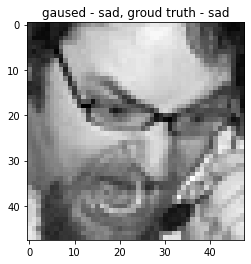

torch.Size([30, 1, 48, 48])
torch.Size([7])


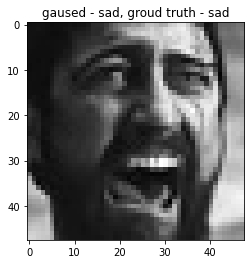

torch.Size([30, 1, 48, 48])
torch.Size([7])


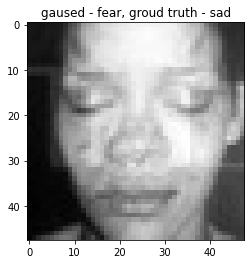

torch.Size([30, 1, 48, 48])
torch.Size([7])


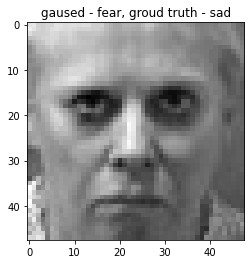

torch.Size([30, 1, 48, 48])
torch.Size([7])


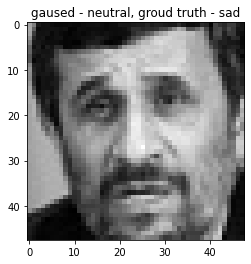

torch.Size([30, 1, 48, 48])
torch.Size([7])


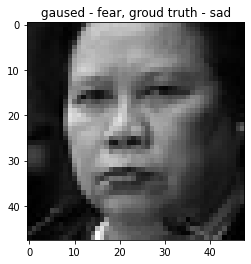

torch.Size([30, 1, 48, 48])
torch.Size([7])


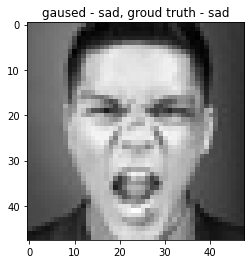

torch.Size([30, 1, 48, 48])
torch.Size([7])


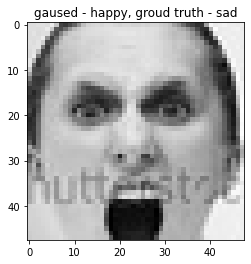

torch.Size([30, 1, 48, 48])
torch.Size([7])


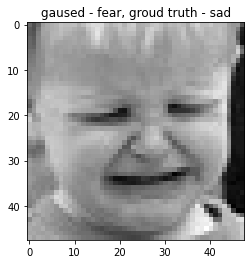

torch.Size([30, 1, 48, 48])
torch.Size([7])


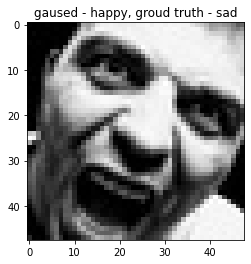

torch.Size([30, 1, 48, 48])
torch.Size([7])


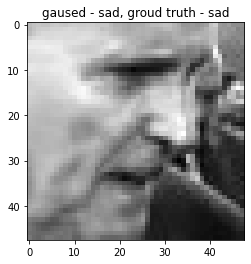

torch.Size([30, 1, 48, 48])
torch.Size([7])


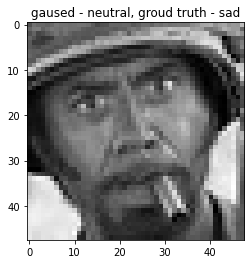

In [57]:
with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        images, labels = data
        images, labels = images, labels
        outputs = ferModel(images)
        print(images.shape)
        print(outputs[0].shape)
        plt.title(f'gaused - {digit_to_classname[outputs[0].argmax().item()]}, groud truth - {digit_to_classname[labels[0].data.item()]}')
        plt.imshow(images[0].cpu().squeeze(), cmap='gray')
        plt.show()
        if i>10:
            break

''

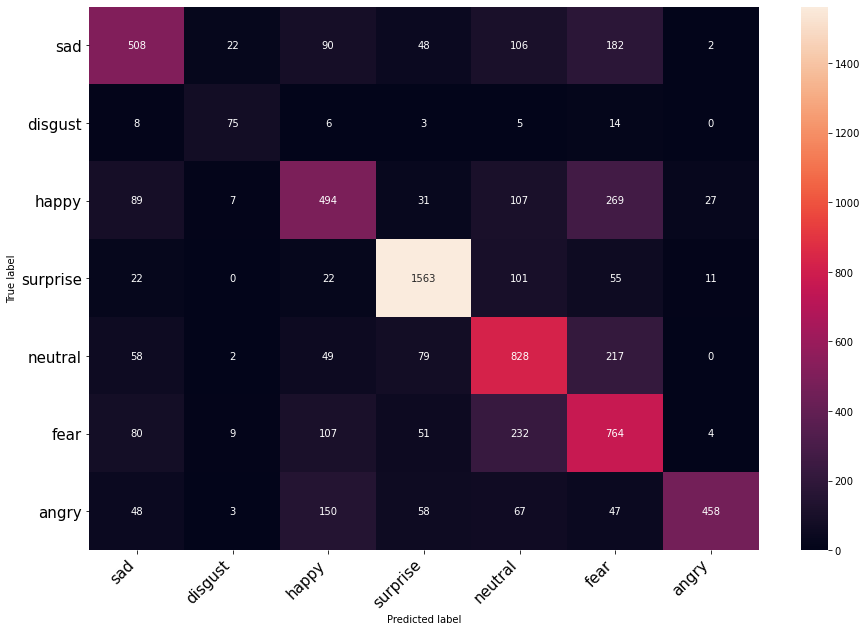

In [38]:
confusion_matrix = torch.zeros(7, 7)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = ferModel(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list(digit_to_classname.values())
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = seaborn.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

# 6. Прототип приложения для определения эмоций человека перед веб-камерой

In [58]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
cap=cv2.VideoCapture(0)
ret, img = cap.read()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [81]:

cv2.imshow('123',img)
cv2.waitKey(0)
cv2.destroyAllWindows ()

In [82]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap=cv2.VideoCapture(0)
ret, img = cap.read()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('123',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cap.release()

In [67]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
from PIL import Image
 

# Класс детектирования и обработки лица с веб-камеры 
class FaceDetector(object):

    def __init__(self, mtcnn, resnet,channels=1):
        # Создаем объект для считывания потока с веб-камеры(обычно вебкамера идет под номером 0. иногда 1)
        self.cap = cv2.VideoCapture(0) 
        self.mtcnn = mtcnn
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.emodel = resnet
        self.channels = channels

    # Функция рисования найденных параметров на кадре
    def _draw(self, frame, boxes, probs, landmarks, emotion):
        try:
            for box, prob, ld in zip(boxes, probs, landmarks):
                # Рисуем обрамляющий прямоугольник лица на кадре
                cv2.rectangle(frame,
                              (int(box[0]), int(box[1])),
                              (int(box[2]), int(box[3])),
                              (0, 0, 255),
                              thickness=2)

                # пишем на кадре какая эмоция распознана
                cv2.putText(frame, 
                    emotion, (int(box[2]), int(box[3])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

                # Рисуем особенные точки
                cv2.circle(frame, (int(ld[0][0]),int(ld[0][1])), 5, (0, 0, 255), -1)
                cv2.circle(frame, (int(ld[1][0]),int(ld[1][1])), 5, (0, 0, 255), -1)
                cv2.circle(frame, (int(ld[2][0]),int(ld[2][1])), 5, (0, 0, 255), -1)
                cv2.circle(frame, (int(ld[3][0]),int(ld[3][1])), 5, (0, 0, 255), -1)
                cv2.circle(frame, (int(ld[4][0]),int(ld[4][1])), 5, (0, 0, 255), -1)
        except Exception as e:
            print('Something wrong im draw function!')
            print(f'error : {e}')

        return frame
    
    # Функция для вырезания лиц с кадра
    @staticmethod
    def crop_faces(frame, boxes):
        faces = []
        for i, box in enumerate(boxes):
            faces.append(frame[int(box[1]-40):int(box[3]+40), 
                int(box[0]-40):int(box[2]+40)])
        return faces
    
    @staticmethod
    def digit_to_classname(digit):
        if digit == 0:
            return 'sad'
        elif digit == 1:
            return 'disgust'
        elif digit == 2:
            return 'happy'
        elif digit == 3:
            return 'surprise'
        elif digit == 4:
            return 'neutral'
        elif digit == 5:
            return 'fear'
        elif digit == 6:
            return 'angry'
       
    # Функция в которой будет происходить процесс считывания и обработки каждого кадра
    def run(self):              
        # Заходим в бесконечный цикл
        while True:
            # Считываем каждый новый кадр - frame
            # ret - логическая переменая. Смысл - считали ли мы кадр с потока или нет
            ret, frame = self.cap.read()
            try:
                # детектируем расположение лица на кадре, вероятности на сколько это лицо
                # и особенные точки лица
                boxes, probs, landmarks = self.mtcnn.detect(frame, landmarks=True)
                print(0,probs)


                # Вырезаем лицо из кадра
                face = self.crop_faces(frame, boxes)[0]
                # Меняем размер изображения лица для входа в нейронную сеть
                face_img = cv2.resize(face,(48,48))
                print(1, face_img.shape)

                face = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
                # Превращаем в 1-канальное серое изображение
                face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
                print(2, face.shape)

                # Далее мы подготавливаем наш кадр для считывания нс
                # Для этого перегоним его в формат pil_image
                face = Image.fromarray(face)
                #face = face.resize((48,48))
                face = np.asarray(face).astype('float')
                face = torch.as_tensor(face)


                # Превращаем numpy-картинку вырезанного лица в pytorch-тензор
                torch_face = face.unsqueeze(0).to(self.device).float()
                print(3, torch_face.shape)
                # Загужаем наш тензор лица в нейронную сеть и получаем предсказание
                emotion = self.emodel(torch_face[None, ...])
                # Интерпретируем предсказание как строку нашей эмоции
                emotion = self.digit_to_classname(emotion[0].argmax().item())
                print(4, emotion)

                # Рисуем на кадре
                self._draw(frame, boxes, probs, landmarks, emotion)

                cv2.imshow("Gray face", face_img)

            except Exception as e:
                print('Something wrong im main cycle!')
                print(f'error : {e}')

            # Показываем кадр в окне, и назвываем его(окно) - 'Face Detection'
            cv2.imshow('Face Detection', frame)
            
            
            # Функция, которая проверяет нажатие на клавишу 'q'
            # Если нажатие произошло - выход из цикла. Конец работы приложения
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
        # Очищаем все объекты opencv, что мы создали
        self.cap.release()
        cv2.destroyAllWindows()

In [69]:
# Загружаем мтцнн
mtcnn = MTCNN()

ourResNet = ResNet(1, 7).to(device)
ourResNet.load_state_dict(torch.load('./models/emotion_detection_model_state_150_epochs.pth'))

# ourResNet = FERModel(1, 7).to(device)
# ourResNet.load_state_dict(torch.load('./models/model2_50_epochs.pth'))


ourResNet.eval()
# Создаем объект нашего класса приложения
fcd = FaceDetector(mtcnn, ferModel)
# Запускаем

fcd.run()

0 [0.9991829]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99929523]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997534]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9994004]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9990031]
S

0 [0.99991405]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99991333]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998697]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9988953]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9944853]


0 [0.9998227]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997147]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99979264]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.999742]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99967337]
S

0 [0.99976283]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99972695]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997198]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997315]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9979079]


0 [0.99971753]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997036]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9996507]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998097]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99836713]


0 [0.9995351]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9996942]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9996062]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9996369]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9990964]
So

0 [0.9981989]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99862504]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9971214]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99773526]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9991067]


0 [0.99833834]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9985892]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9988091]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99903035]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9982804]


0 [0.99962056]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.999602]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9995939]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9995035]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9995771]
So

0 [0.9994685]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99968016]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9996736]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997166]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99966276]


0 [0.99962795]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99958044]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99969006]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99968064]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998449

0 [0.9992268]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9991417]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9991049]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9995559]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99978596]
S

0 [0.9991498]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99888736]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99978346]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99982506]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9990343]

0 [0.99628085]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.998777]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99969935]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9994972]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.999835]
So

0 [0.9999349]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998852]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99982446]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9999019]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998796]
S

0 [0.9997365]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9997658]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99981624]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9998128]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.99976283]


0 [0.99882144]
Something wrong im main cycle!
error : OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

0 [0.9993476]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.9996136]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.999241]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.999699]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.9995401]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.99952567]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.99836105]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.9986222]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.9962418]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.9949326]
1 (48, 48, 3)
2 (48, 48)
3 torch.Size([1, 48, 48])
4 sad
0 [0.98811173]
1 (48, 48, 3)
2 (48, 48)
3 t

## 7. Пару слов о Transfer Learning

Даная техника применяется в тех случаях, когда мы берем модель, которая уже была обучена на схожих данных. И при этом эта техника очень эффективна, даже когда у нас мало данных.


Возьмем например модель InceptionResnetV1 обученную на vggface2:

In [65]:
from facenet_pytorch import InceptionResnetV1

face_model = InceptionResnetV1(pretrained='vggface2', num_classes=7)

Когда модель загружается в PyTorch, все ее параметры имеют поле «require_grad», установленное по умолчанию «true». Это означает, что каждое и каждое изменение значений параметров будет сохранено для использования в графе обратного распространения, используемом для обучения. Это увеличивает требования к памяти. Итак, так как большинство параметров в нашей предварительно обученной модели уже обучены, мы возвращаем в поле require_grad значение false.

In [66]:
for param in face_model.parameters():
    param.requires_grad = False

Затем мы заменяем последний слой модели InceptionResnetV1 небольшим набором последовательных слоев. Входы на последний полностью подключенный уровень InceptionResnetV1 поступают на линейный уровень, который имеет 256 выходов, которые затем подаются на уровни ReLU и Dropout. Затем следует линейный слой 256 x 7, который имеет 7 выходов, соответствующих 7 классам.

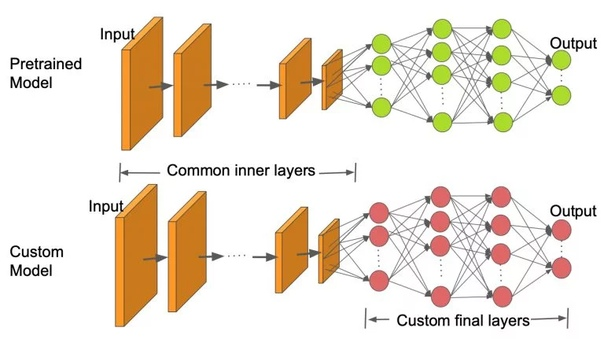

Мы можем посмотреть архитектуру модели:

In [67]:
face_model

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

И увидим, что последний слой называется logits. Давайте узнаем какой размер входа у этого слоя (in_features) и заменим этот слой на последовательность наших.

In [68]:
face_model.classify = True
fc_inputs = face_model.logits.in_features
face_model.logits = nn.Sequential(nn.Linear(fc_inputs, 256),
                          nn.ReLU(),
                          nn.Dropout(0.4),
                          nn.Linear(256,7),
                          nn.Softmax(dim=1))

Теперь мы можем увидеть, что последняя часть архитектуры изменилась:

In [69]:
face_model

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

Отправим нашу сеть на нужное устройство:

In [70]:
face_model = face_model.to(device)

Давайте проверим, что наша нейронная сеть нормально работает. Для этого создадим рандомную картинку и прогоним через нашу модель и получим какой-то выход:

In [71]:
rand_tensor = torch.rand((32, 3, 224, 224)).to(device)
predicts = face_model(rand_tensor)
print(predicts.size())

torch.Size([32, 7])


Выведем количество параметров, которое есть в сети и которое готово обучаться:

In [72]:
total_params = sum(p.numel() for p in face_model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in face_model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

23,615,751 total parameters.
133,127 training parameters.


Подготовим все для обучения:

In [76]:
epochs = 24
epoch_losses = []
loss_func = nn.CrossEntropyLoss()
face_optimizer = torch.optim.SGD(face_model.parameters(), lr=0.01)
face_sheduler  = torch.optim.lr_scheduler.StepLR(face_optimizer, step_size=7, gamma=0.1)

Для обучения нужно увеличить размер картинки, и нужно загружать картинки с 3 каналами. И возмем батч = 32, т.к. в 200 у меня уже не выдерживает видео-память :

In [77]:
train_3_chnl_transform = tt.Compose([# Настройки для расширения датасета
                         tt.RandomHorizontalFlip(),           # Случайные повороты на 90 градусов
                         tt.RandomRotation(30),               # Случайные повороты на 30 градусов
                         tt.Resize((160,160)),
                         tt.ToTensor()])                      # Приведение к тензору

train_3chnl_dataset = ImageFolder(data_dir + '/train', transform = train_3_chnl_transform)
test_3chnl_dataset = ImageFolder(data_dir + '/test', transform = tt.ToTensor())

train_3chnl_dataloeader = DataLoader(train_3chnl_dataset, batch_size=32, shuffle=True,  pin_memory=True)
test_3chnl_dataloeader = DataLoader(test_3chnl_dataset, batch_size=32, num_workers=3, pin_memory=True)

Запустим обучение:

In [83]:
for epoch in range(epochs):
    time1 = time.time()
    
    face_model.train()
    running_loss = 0.0
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_3chnl_dataloeader):
        
        data, labels = Variable(data), Variable(labels)
        data.requires_grad=True
        
        data = data.to(device)
        labels = labels.to(device)

        
        face_optimizer.zero_grad()
        
        with torch.set_grad_enabled(True):
            outputs = face_model(data)
            
            loss = loss_func(outputs, labels)
            loss.backward()

            face_optimizer.step()
            face_sheduler.step()
        
        running_loss += loss.item()
        epoch_loss.append(loss.item())

    print(f'Epoch {epoch+1}, loss: ', np.mean(epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 1, loss:  1.9449339381286077
Epoch 2, loss:  1.9450188194002425
Epoch 3, loss:  1.9446232463898403
Epoch 4, loss:  1.9449075661333544
Epoch 5, loss:  1.9451203528525574
Epoch 6, loss:  1.9447228710300155
Epoch 7, loss:  1.9448054828015822
Epoch 8, loss:  1.945072649578963
Epoch 9, loss:  1.9448075146813477
Epoch 10, loss:  1.9448892358424408
Epoch 11, loss:  1.944706480817071
Epoch 12, loss:  1.945003588151719
Epoch 13, loss:  1.944876712480826
Epoch 14, loss:  1.9448101890406437
Epoch 15, loss:  1.9448111928733331
Epoch 16, loss:  1.9447401708790235
Epoch 17, loss:  1.9447010486785854
Epoch 18, loss:  1.944657625497452
Epoch 19, loss:  1.9448411286409413
Epoch 20, loss:  1.9445447261844362
Epoch 21, loss:  1.9446653058486325
Epoch 22, loss:  1.94491564974721
Epoch 23, loss:  1.94445258126195
Epoch 24, loss:  1.9451353635106767


По подробнее про процесс передачи обучения можно почитать [здесь](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)

# Про распознавание эмоций:

1) [сервис для распознавания эмоций 1](https://www.morphcast.com/)  
2) [сервис для распознавания эмоций 2](https://www.enablex.io/cpaas/faceai/)

### Другие ссылки

[некий зоопарк моделей определения эмоций на pytorch](https://www.robots.ox.ac.uk/~albanie/pytorch-models.html)